EXTRA - Você começou a estudar numpy exercitando no colab que o professor Leonardo enviou em sala, gostou muito e quis propor uma questão aceitando o desafio usando o que aprendeu. Desenvolveu uma questão e inclusive que apresentou uma aplicação prática unindo outro conhecimento ou hobby que possui apresentando a solução com um código bem comentado. (valor 1.0)

[obs.: o uso agregado ou a substituição por outro framework estudado está liberado por ser uma questão extra. Exemplo: Desenvolvimento usando um conhecimento ou hobby usando um framework de IA que tenha visto nos videos de frameworks das turmas anteriores. ]

### Você foi encarregado pelo Centro de Excelência em IA para descobrir qual meio de tele-comunicações do CEIA tem mais efeito na quantidade de publico atingindo  em função do investimento em: instagram, linkedIn, Facebook e Eventos. Ademais você tambem foi encarregado de criar um modelo de IA que recebesse os valores investidos em cada meio, e crie-se um modelo de previsão da quantidade de publico que seria esperada atingir.

#### Primeiro é mostrado o gráfico que relaciona as colunas da tabela entre sí, mas a parte que realmente importa é a da linha de Alcance, que fornece de forma rapida e intuitiva qual meio telecomunicativo influencia mais no alcance de pessoas atingidas. Por padrão, Evento e Instagram possuem grande influência quando sofrem investimentos (ou não).

#### Em seguida criamos uma IA que treinou em cima da nossa base de dados, e por fim ela mostra os resultados (alcance) esperado da tabela nova.



###### obs: Os valores da tabela estão em milhares
###### Sinta-se a vontade para editar os valores da tabela "dadosceiafuturo.xlsx" para descobrir novas previsões da IA.


____________________________________________________________________________________________________________________
###### Para a execução desse projeto será necessario instalar as bibliotecas matplotlib , seaborn , scikit-learn. 
###### Eu não estarei dando o comando !pip install , pois ja tenho em minha maquina as bibliotecas, mas caso esteja executando em outro computador, retire a "#" do codigo abaixo. (Descomente)

In [1]:
#!pip install matplotlib

#!pip install seaborn

#!pip install scikit-learn

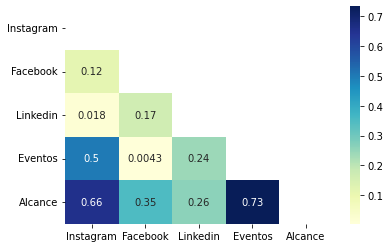

In [8]:
#Todas as importaçoes do projetinho (da pra notar que foi pouca coisa kk)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importar modulo de IA
from sklearn.linear_model import LinearRegression #Lembra a equação da reta // função do primeiro grau
from sklearn.ensemble import RandomForestRegressor #Perguntas para a base de dados
from sklearn.metrics import r2_score #Importando o validador // Accuracy // Precisão da nossa IA

#descobrir a correlação dentro da tabela por meio de graficos (matplot & seaborn)

tabela = pd.read_excel('dadosceia.xlsx') #importar tabela
#parte que cria o grafico bonitinho (obs: se quiser mudar de cor apaga o parametro "cmap")
corr = tabela.corr() 
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="YlGnBu")
plt.show()

In [3]:
#Parte de dados para a Inteligencia Artificcial 
from sklearn.model_selection import train_test_split #importar uma ferramenta do sklearn para treino da IA
#definir x e y (sendo, x =  o que a IA analisa, y = o que ela preve para nós a partir da analise de x)
x = tabela[['Instagram','Facebook','Linkedin','Eventos']] #o que vamos analisar
y = tabela['Alcance'] #objetivo / o que queremos na saida da previsão

#separar os dados em treino e teste
#formato padrao do train teste split ---> (x_treino, x_teste, y_treino, y_teste)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3) #teste_size define a porcentagem que sera separada para teste.


In [4]:
#Chamando 2 IA's // dando nome a elas
ia_regressao_linear = LinearRegression()
ia_arvoredecisao = RandomForestRegressor()

#Treinar as IA's
ia_regressao_linear.fit(x_treino, y_treino)
ia_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [5]:
previsao_regressaolinear = ia_regressao_linear.predict(x_teste) #previsão da ia regressao linear
previsao_arvoredecisao = ia_arvoredecisao.predict(x_teste) #previsao da ia de arvore de decisao

#compara as previsões com o gabarito
score_ia_rlinear = r2_score(y_teste, previsao_regressaolinear) #atribuir o score da regressao linear
score_ia_arvore = r2_score(y_teste, previsao_arvoredecisao) #atribuir o score da arvore de decisao

if score_ia_rlinear > score_ia_arvore: #descobrir qual a melhor IA
    print(f'A IA de Regressão linear obteve maior score; {score_ia_rlinear:.4%} de precisão, a outra IA obteve: {score_ia_arvore:.4%} de precisão ')
else:
    print(f'A IA de Arvore de decisão obteve maior score; {score_ia_arvore:.4%} de precisão, a outra IA obteve: {score_ia_rlinear:.4%} de precisão ')

A IA de Arvore de decisão obteve maior score; 93.5428% de precisão, a outra IA obteve: 71.6637% de precisão 


In [6]:
previsao_futura_ceia = pd.read_excel('dadosceiafuturo.xlsx') #adicionando o arquivo que seria a base de dados atual para realizar a previsao
nova_previsao = ia_arvoredecisao.predict(previsao_futura_ceia) #atribuindo nova precisao
previsao_futura_ceia['Previsão'] = nova_previsao #Criando uma nova coluna chamada Previsão, com a resposta da previsao da IA.

display(previsao_futura_ceia) #Mostrar ao usuario a tabela e a nova previsão.

,Instagram,Facebook,Linkedin,Eventos,Previsão
0,23.8,15.9,18.3,7.8,6.481
1,97.5,16.9,19.1,80.2,11.906
2,204.1,12.6,53.4,220.3,18.232
3,195.4,3.5,23.5,59.6,16.251
4,67.8,29.3,49.6,0.7,9.685
5,281.4,16.7,26.2,265.2,20.026
6,69.2,27.1,18.3,8.4,9.687
7,147.3,16.0,19.5,219.8,19.012


###### Essa questão me levou 1 dia e 2horas para ser feita (levou todo meu Fim de semana embora kk), espero que goste :)
###### Agradecimento ao professor Anderson Soares que me respondeu no whatsapp me informando que os meios de tele-comunição do CEIA são Instagram, Fan page Facebook, LinkedIn e Eventos corporativos com empresas. Assim podendo deixar a questão um pouco mais proxima da realidade.